**Tabla de contenido**

- [Recordatorio](#Recordatorio)
- [Comprender el proyecto capstone](#Comprender-el-proyecto-capstone)
    - [Objetivo de este proyecto final](#Objetivo-de-este-proyecto-final)
- [Manipulación y preprocesamiento de datos](#Manipulacion-y-preprocesamiento-de-datos)
    - [Manejo de datos faltantes](#Manejo-de-datos-faltantes)
    - [Data conversion](#Data-conversion)
    - [Data resampling](#Data-resampling)

# Recordatorio

¡Felicidades por haber llegado hasta aquí! En los capítulos 12 a 17, nos sumergimos de lleno en el aprendizaje profundo para la predicción de series temporales. Aprendiste que los modelos estadísticos se vuelven ineficaces o inutilizables cuando tienes grandes conjuntos de datos, lo que generalmente significa más de 10,000 puntos de datos, con muchas características. Entonces debemos volver a utilizar modelos de aprendizaje profundo, que pueden aprovechar toda la información disponible mientras siguen siendo computacionalmente eficientes, para producir modelos de predicción.

Así como tuvimos que diseñar un nuevo procedimiento de pronóstico en el capítulo 6 cuando comenzamos a modelar series temporales con el modelo ARMA(p,q), modelar con técnicas de aprendizaje profundo requirió que utilizáramos otro procedimiento de modelado: crear ventanas de datos con la clase DataWindow. Esta clase desempeña un papel vital en el modelado con aprendizaje profundo, ya que nos permite formatear nuestros datos adecuadamente para crear un conjunto de entradas y etiquetas para nuestros modelos.

![Ventanas](fig/ventanas.png)

Figura 18.1 *Ejemplo de una ventana de datos. Esta ventana de datos tiene 24 pasos de tiempo como entrada y 24 pasos de tiempo como salida. El modelo utilizará 24 horas de entrada para generar 24 horas de predicciones. La longitud total de la ventana de datos es la suma de las longitudes de las entradas y las etiquetas. En este caso, tenemos una longitud total de 48 pasos de tiempo.*

Este paso de segmentación de datos nos permite producir una amplia variedad de modelos, desde modelos lineales simples hasta redes neuronales profundas, redes de memoria a largo y corto plazo (LSTM) y redes neuronales convolucionales (CNN). Además, la segmentación de datos se puede utilizar para diferentes escenarios, lo que nos permite crear modelos de un solo paso donde solo predigimos el siguiente paso de tiempo, modelos de múltiples pasos donde predigimos una secuencia de pasos futuros y modelos de múltiples salidas donde predigimos más de una variable objetivo.

Después de haber trabajado con aprendizaje profundo en los últimos capítulos, es hora de aplicar nuestros conocimientos a un proyecto final. En este capítulo, recorreremos los pasos de un proyecto de pronóstico utilizando modelos de aprendizaje profundo. Primero, veremos el proyecto y describiremos los datos que utilizaremos. Luego cubriremos los pasos de preparación y preprocesamiento de datos. Aunque esos pasos no se relacionan directamente con el pronóstico de series de tiempo, son pasos cruciales en cualquier proyecto de aprendizaje automático. Luego, nos centraremos en los pasos de modelado, donde probaremos un conjunto de modelos de aprendizaje profundo para descubrir el que mejor funcione.


# Comprender el proyecto capstone

Para este proyecto, utilizaremos un conjunto de datos que rastrea el consumo de energía eléctrica de un hogar. El conjunto de datos "Consumo eléctrico individual del hogar" está disponible públicamente en el Repositorio de Aprendizaje Automático de UC Irvine: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

Predecir el consumo de energía eléctrica es una tarea común con aplicaciones en todo el mundo. En los países en desarrollo, puede ayudar en la planificación de la construcción de redes eléctricas. En los países donde la red ya está desarrollada, predecir el consumo de energía asegura que la red pueda proporcionar suficiente energía para abastecer a todos los hogares de manera eficiente. Con modelos de pronóstico precisos, las empresas de energía pueden planificar mejor la carga en la red, asegurando que producen suficiente energía durante los picos de demanda o que tienen reservas energéticas suficientes para satisfacer la demanda. Además, pueden evitar producir demasiada electricidad, lo que, si no se almacena, podría causar un desequilibrio en la red, planteando un riesgo de desconexión. `Por lo tanto, predecir el consumo de energía eléctrica es un problema importante que tiene consecuencias en nuestra vida diaria.`

Para desarrollar nuestro modelo de pronóstico, utilizaremos el conjunto de datos de consumo de energía mencionado anteriormente, que contiene el consumo eléctrico de una casa en Sceaux, Francia, entre `diciembre de 2006 y noviembre de 2010`. Los datos abarcan 47 meses y se registraron cada minuto, lo que significa que tenemos más de dos millones de puntos de datos.

El conjunto de datos contiene un `total de nueve columnas`, enumeradas en la tabla 18.1. `El objetivo principal es la potencia activa global`, ya que representa la potencia real utilizada en un circuito. Este es el componente que utilizan los aparatos. La potencia reactiva, por otro lado, se mueve entre la fuente y la carga de un circuito, por lo que no produce ningún trabajo útil.

Este conjunto de datos no incluye información meteorológica, que podría ser un fuerte predictor del consumo de energía. Podemos esperar con seguridad que durante los días calurosos de verano, el aire acondicionado funcionará por más tiempo, requiriendo así más energía eléctrica. Lo mismo se puede esperar durante los fríos días de invierno, porque calentar una casa requiere una gran cantidad de energía. Estos datos no están disponibles aquí, pero en un entorno profesional podríamos solicitar este tipo de datos para complementar nuestro conjunto de datos y potencialmente producir mejores modelos.

Ahora que tienes un entendimiento general del problema y del conjunto de datos, definamos el objetivo de este proyecto y los pasos que tomaremos para lograrlo.

## Objetivo de este proyecto final

El objetivo de este proyecto de culminación es `crear un modelo que pueda predecir las próximas 24 horas de potencia activa global`. Si te sientes seguro, este objetivo debería ser suficiente para que descargues el conjunto de datos, lo trabajes por tu cuenta y compares tu proceso con el que se presenta en este capítulo.

De lo contrario, aquí están los pasos que deben realizarse:

1. `Transformación y preprocesamiento de datos`. Este paso es opcional. No está directamente relacionado con la previsión de series temporales, pero es un paso importante en cualquier proyecto de aprendizaje automático. Puedes omitir este paso con seguridad y comenzar en el paso 2 con un conjunto de datos limpio:
    - Calcula el número de valores faltantes.
    -  Imputa los valores faltantes.
    - Expresa cada variable como un valor numérico (todos los datos se almacenan originalmente como cadenas).
    - Combina las columnas de Fecha y Hora en un objeto DateTime.
    - Determina si los datos muestreados cada minuto son utilizables para la previsión.
    - Re-muestrea los datos por hora.
    - Elimina cualquier hora incompleta.
2. `Ingeniería de características`:
    - Identificar cualquier estacionalidad.
    - Codifica el tiempo con una transformación de seno y coseno.
    - Escalar los datos
3. `Divide los datos`:
    - Haz una división 70:20:10 para crear conjuntos de entrenamiento, validación y prueba.
4. `Prepárate para el modelado de aprendizaje profundo`:
    - Implementar la clase DataWindow.
    - Define la función compile_and_fit.
    - Crea un diccionario de índices de columna y nombres de columna.
5. `Modelo con aprendizaje profundo`:
    - Entrenar al menos un modelo base
    - Entrenar un modelo lineal
    - Entrenar una red neuronal profunda.
    - Entrena un LSTM.
    - Entrenar una CNN
    - Entrenar una combinación de LSTM y CNN
    - Entrenar un LSTM autorregresivo
    - Selecciona el modelo de mejor rendimiento

# Manipulacion y preprocesamiento de datos

El manejo de datos es el proceso de transformar datos en una forma que sea fácilmente utilizable para modelar. Este paso generalmente implica explorar datos faltantes, completar valores en blanco y asegurar que los datos tengan el tipo correcto, lo que significa que los números son valores numéricos y no cadenas de texto. Este es un paso complejo y probablemente el más vital en cualquier proyecto de aprendizaje automático. Tener datos de mala calidad al inicio de un proyecto de pronóstico es una garantía de que tendrás pronósticos de mala calidad.

In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt

import tensorflow as tf

# semillas para reproductibilidad
tf.random.set_seed(42)
np.random.seed(42)

2025-07-16 09:46:58.800398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752677218.847305    7614 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752677218.860755    7614 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752677218.963657    7614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752677218.963674    7614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752677218.963675    7614 computation_placer.cc:177] computation placer alr

`Lectura del dataframe`

In [2]:
file_path = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(file_path('household_power_consumption.txt'), sep=';')

df.head() # veamos los primeros cinco registros

/tmp/ipykernel_7614/3727698283.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path('household_power_consumption.txt'), sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Veamos los últimos cinco registros.

In [3]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## Manejo de datos faltantes

Ahora revisemos si hay valores faltantes. Podemos hacer esto encadenando el método isna() con el método sum(). Esto devuelve la suma de valores faltantes para cada columna de nuestro conjunto de datos.

In [4]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

Solo la columna `Sub_metering_3` tiene datos faltantes, equivalentes a $(25979 / 2075259) \times 100 = 1.25\%$

Hay dos opciones que podemos explorar para tratar con los valores faltantes.

- Primero, podríamos simplemente eliminar esta columna, ya que ninguna de las otras características tiene valores faltantes. - Segundo, podríamos rellenar los valores faltantes con un cierto valor. Este proceso se llama imputación.

`Primero comprobaremos si hay muchos valores perdidos consecutivos`. `Si ese es el caso, es preferible deshacerse de la columna, ya que imputar muchos valores consecutivos probablemente introducirá una tendencia inexistente en nuestros datos. De lo contrario, si los valores perdidos están dispersos en el tiempo, es razonable llenarlos. El siguiente bloque de código muestra la longitud de la secuencia más larga de valores perdidos consecutivos:


In [5]:
na_groups = df['Sub_metering_3'].notna().cumsum()[df['Sub_metering_3'].isna()]
len_consecutive_na = na_groups.groupby(na_groups).agg(len)
longest_na_gap = len_consecutive_na.max()
print(longest_na_gap)

7226


Esto resulta en una duración de 7226 minutos consecutivos de datos faltantes, lo que equivale a aproximadamente 5 días. En este caso, `la brecha es definitivamente demasiado grande para llenarse con valores faltantes`, así que eliminaremos esta columna del conjunto de datos.


In [6]:
df = df.drop(columns=['Sub_metering_3'], axis=1)

## Data conversion

Ahora comprobemos si nuestros datos tienen el tipo correcto. Deberíamos estar estudiando datos numéricos, ya que nuestro conjunto de datos es una colección de lecturas de sensores. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Date                   object
 1   Time                   object
 2   Global_active_power    object
 3   Global_reactive_power  object
 4   Voltage                object
 5   Global_intensity       object
 6   Sub_metering_1         object
 7   Sub_metering_2         object
dtypes: object(8)
memory usage: 126.7+ MB


Podemos convertir cada columna a un valor numérico con la función `to_numeric de pandas`. Esto es esencial, ya que nuestros modelos esperan datos numéricos. Tenga en cuenta que no convertiremos las columnas de fecha y hora a valores numéricos; estas se procesarán en un paso posterior.

In [8]:
cols_to_convert = df.columns.difference(['Date','Time'])  # Todas menos 'Date','Time'
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

## Data resampling

El siguiente paso es verificar si los datos muestreados cada minuto son apropiados para la modelización. Es posible que los datos muestreados cada minuto sean demasiado ruidosos para construir un modelo predictivo eficiente.

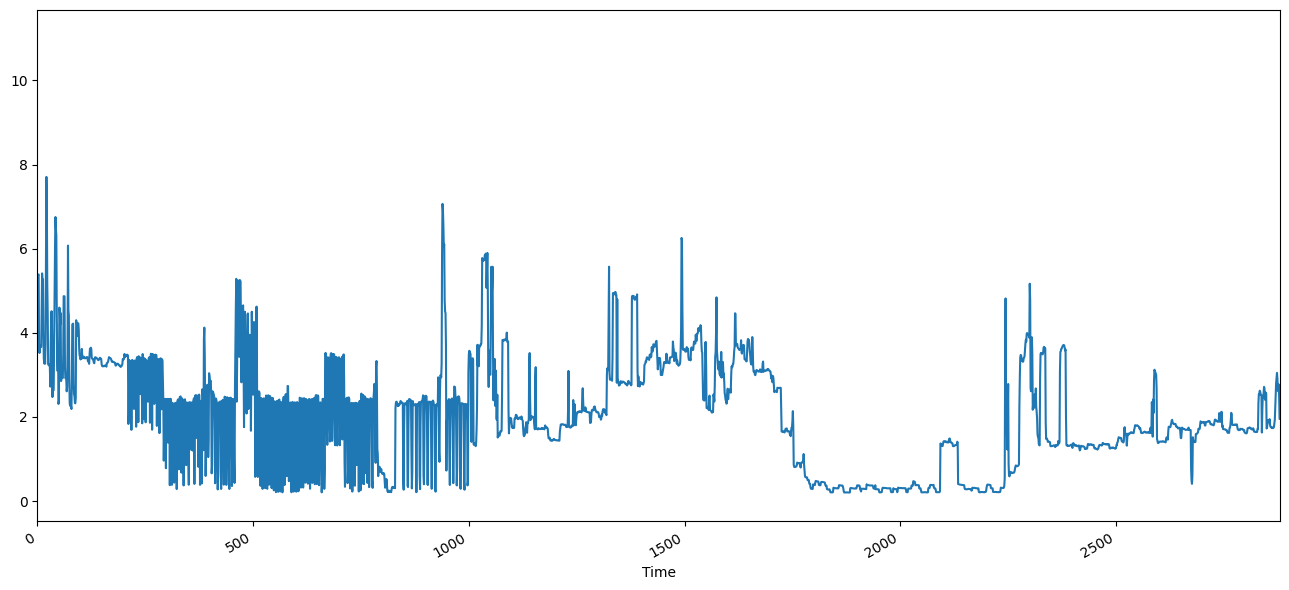

In [9]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['Global_active_power'])
ax.set_xlabel('Time')
ax.set_xlim(0, 2880)
fig.autofmt_xdate()
plt.tight_layout()

La figura 18.3 muestra que los datos son muy ruidosos, con grandes oscilaciones o secuencias planas que ocurren cada minuto. Este tipo de patrón es difícil de prever utilizando un modelo de aprendizaje profundo, ya que parece moverse al azar. Además, podríamos cuestionar la necesidad de prever el consumo de electricidad por minuto, ya que los cambios en la red no pueden ocurrir en intervalos de tiempo tan cortos.

Por lo tanto, definitivamente necesitamos re-muestrear nuestros datos. En este caso, re-muestrearemos por hora. De esa manera, esperamos suavizar los datos y descubrir un patrón que puede ser más fácil de predecir con un modelo de aprendizaje automático.

Para hacer esto, necesitaremos un tipo de dato datetime. Podemos combinar las columnas de Fecha y Tiempo para crear una nueva columna que contenga la misma información con un tipo de dato datetime.

In [10]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0


Dado que la columna `Date` y `Time` estan separadas, convirtamosla a una sola fecha. 

In [11]:
df['datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)
df = df.drop(columns=['Date','Time'], axis=1)


Ahora podemos re-muestrear nuestros datos. En este caso, tomaremos una suma por hora de cada variable. De esa manera sabremos la potencia eléctrica total consumida por el hogar cada hora.

In [12]:
hourly_df = df.resample('h', on='datetime').sum()
hourly_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
datetime,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0


Recuerda que nuestros datos comenzaron el 16 de diciembre de 2006, a las 5:24 p.m. y terminaron el 26 de noviembre de 2010, a las 9:02 p.m. Con el nuevo muestreo, ahora tenemos una suma de cada columna por hora, lo que significa que tenemos datos que comienzan el 16 de diciembre de 2006, a las 5 p.m. y terminan el 26 de noviembre de 2010, a las 9 p.m. Sin embargo, la primera y la última fila de datos no tienen un total completo de 60 minutos en su suma. La primera fila calculó la suma de 5:24 p.m. a 5:59 p.m., que son 35 minutos. La última fila calculó la suma de 9:00 p.m. a 9:02 p.m., que son solo 2 minutos. Por lo tanto, eliminaremos la primera y última fila de datos para trabajar solo con sumas de horas completas.

In [13]:
hourly_df = hourly_df.drop(hourly_df.tail(1).index)
hourly_df = hourly_df.drop(hourly_df.head(1).index)

Finalmente, este proceso ha cambiado el índice. Personalmente, prefiero tener el índice como enteros y las fechas como una columna, así que simplemente reiniciaremos el índice de nuestro DataFrame.

In [14]:
hourly_df = hourly_df.reset_index()
hourly_df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0
1,2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0
2,2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0
3,2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0
4,2006-12-16 22:00:00,132.008,3.370,14325.60,571.4,0.0,8.0


Veriquemos que la frecuencia realmente está en horas.

In [15]:
dif = hourly_df['datetime'].diff().dt.total_seconds()
dif = dif.value_counts().reset_index()
dif.columns =['Segundos','cantidad']
dif['Horas'] = dif['Segundos']/3600
dif.head()

,Segundos,cantidad,Horas
0,3600.0,34586,1.0


Podemos opcionalmente verificar la forma de nuestros datos usando hourly_df.shape, y veríamos que ahora tenemos 34,587 filas de datos. Esto es una drástica reducción de las dos millones de filas originales. Sin embargo, un conjunto de datos de este tamaño es definitivamente adecuado para métodos de aprendizaje profundo.

In [16]:
hourly_df.shape

(34587, 7)

Volvamos a trazar nuestro objetivo para ver si el remuestreo de nuestros datos generó un patrón discernible que se pueda pronosticar. Aquí trazaremos los primeros 15 días de potencia activa global muestreada por hora:

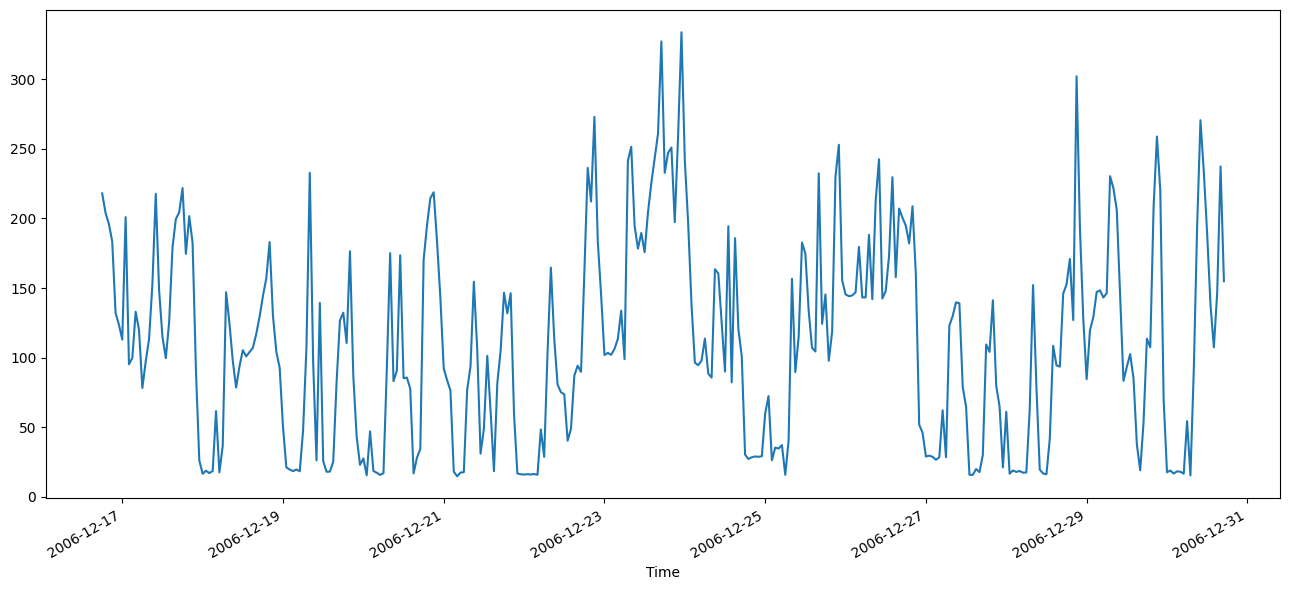

In [17]:
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(hourly_df['datetime'][:336],hourly_df['Global_active_power'][:336])
ax.set_xlabel('Time')
fig.autofmt_xdate()
plt.tight_layout()

Una vez finalizada la disputa de datos, podemos guardar nuestro conjunto de datos como un archivo CSV para tener una versión limpia de nuestros datos que usaremos en el modelado.

In [19]:
hourly_df.to_csv('data/clean_household_power_consumption.csv',header=True, index=False)